In [ ]:
import pytorch 

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.keys()
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


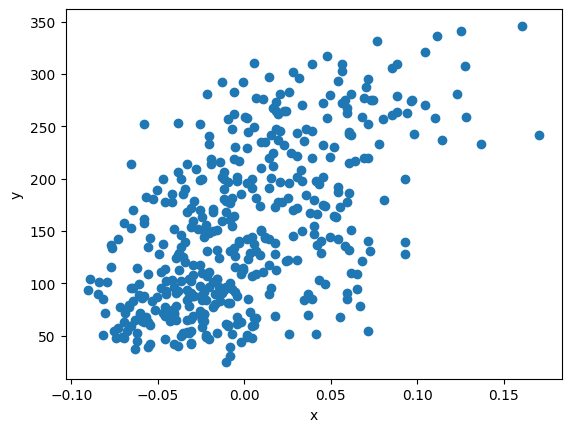

In [2]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 인공신경망(뉴런)
- w, b의 초기값을 무작위로 생성
- yHat(여러 개의 계산공식 중 한개를 택해서)을 계산해서 y와의 차이인 오차 계산
- 오차가 0이 되도록 w, b값을 변경 (경사하강, 미분)
- 업데이트 된 w, b를 이용해서 다시 계산 (오차역전파)
- 사용자가 지정한만큼 위의 과정 반복 혹은 오차가 

In [3]:
x = diabetes.data[:, 2]
y = diabetes.target

913.5973364346786 123.39414383177173


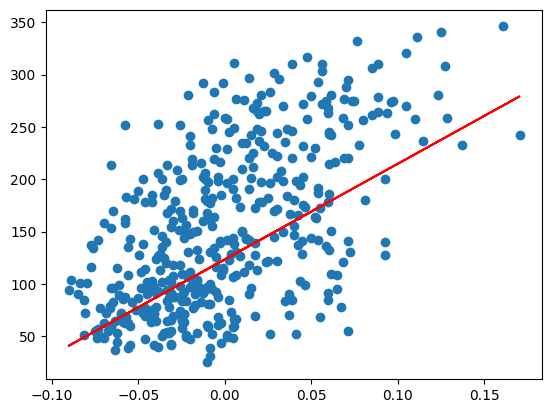

In [18]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=1): # 에포크는 전체 데이터가 돌아간 후
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산 # 배치 사이즈 하나
                err = -(y_i - y_hat)      # 오차 계산 # (경사하강)
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트
                # print(x,y,y_hat,err,w_grad,b_grad,self.w,self.b)
                # print('-'*100)
        print(neuron.w, neuron.b)
        plt.scatter(x,y)
        plt.plot(x,x*neuron.w+neuron.b, 'r')
        plt.show()
neuron = Neuron()
cnt = len(x)
neuron.fit(x[:cnt],y[:cnt])


In [6]:
x[0], y[0] # 엑셀로 검수를 해보자

(0.061696206518683294, 151.0)

- w,b의 갱신시점
  - 배치당(오차계산할 x,y행의 갯수)
    - 배치가 작을수록 오버피팅이 된다 (평균보다 데이터 하나하나)
    - 그러나 시간이 오래걸린다. 하나하나 피팅되니까
    - 안맞는 데이터로 먼저 학습을 시킨다
  - 에포크당